# covid-19 data analysis

data updated every day

!pip install geocoder

In [53]:
# Importing modules
import pandas as pd  
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import datetime 
import geocoder
import folium
from folium import plugins 

In [10]:
!git clone https://github.com/CSSEGISandData/COVID-19.git

fatal: destination path 'COVID-19' already exists and is not an empty directory.


In [40]:
world_df='/Users/sim.singh/Desktop//COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'



In [43]:
df = pd.read_csv(world_df)

In [44]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,918,922,925,925,925,937,939,939,944,955
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,...,868,870,871,874,874,874,875,878,878,878
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1711,1726,1728,1730,1734,1734,1760,1763,1768,1796
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,378,378,378,386,386,386,388,388,396,396
264,NaN,Tajikistan,38.861000,71.276100,0,0,0,0,0,0,...,7320,7366,7409,7451,7495,7538,7583,7625,7665,7706


In [79]:
grouped_conf_df = conf_df.groupby(by = ['Country/Region'], as_index = False).sum()

In [106]:
desc_grp_conf_df = grouped_conf_df.sort_values(by=conf_df.columns[-1], ascending=False)

In [81]:
last_col = conf_df.columns[-1]

In [47]:
def get_total_confirmed_global_cases():
    global_cases = conf_df.iloc[:, 4:].apply(sum, axis=0)
    global_cases.index = pd.to_datetime(global_cases.index)
    return global_cases

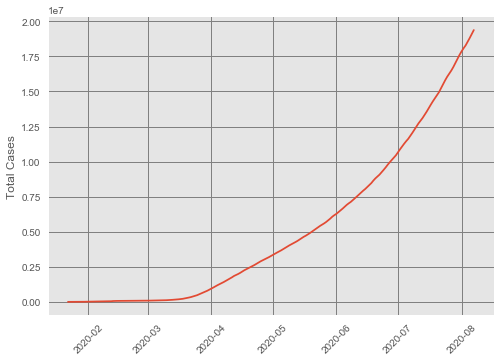

In [71]:
dt_series = get_total_confirmed_global_cases()
plt.style.use('ggplot')
plt.plot(dt_series.index,dt_series)
plt.xticks(rotation = 45)
plt.ylabel("Total Cases")
plt.grid(linestyle='-', c='grey')


note that this is not only a extreme inclime from march but it was around that time when WHO said that covid-19 was a pandemic and then testing started

In [88]:
       world_map = folium.Map(location = [0, 0], 
                            width = 1500, height = 500, 
                            left = f"{5}%", top = f"{5}%",
                             zoom_start = 2)

In [98]:
for i in grouped_conf_df.index:
            folium.Circle(location = [grouped_conf_df.loc[i, 'Lat'], grouped_conf_df.loc[i, 'Long']], 
                          radius = int(grouped_conf_df.loc[i, last_col]) / 2, 
                          popup = "{}\n {}\n on {}".format(grouped_conf_df.loc[i, 'Country/Region'],
                                                          grouped_conf_df.loc[i, last_col], 
                                                          last_col), 
                          fill = True).add_to(world_map) 
  

In [99]:
world_map

to see the world map as displayed in the readme you have to download the code

here you can scroll around (and zoom in or out) and see the most infected places you can also compare them to the bar graph 

<strong>TakeAway:</strong>you can clearly see that amarica is the most infected 

Text(0.5, 0, 'Total Confirmed Cases (in millions) as of August 07, 2020')

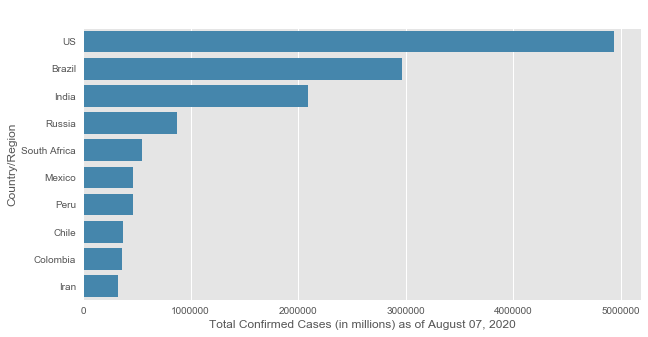

In [125]:
blue=sns.color_palette()[1]
last_col = conf_df.columns[-1]
latest_date = datetime.datetime.strptime(last_col, '%m/%d/%y').strftime('%B %d, %Y') # Modify the latest date in the 'Month DD, YYYY' format.
plt.figure(figsize = (10, 5))
plt.title(f'Top {10} Countries with Highest COVID-19 Confirmed Cases', 
              fontsize = 21)
sns.barplot(desc_grp_conf_df[last_col].head(10), desc_grp_conf_df['Country/Region'].head(10), orient = 'h',color=blue)
plt.xlabel(f'Total Confirmed Cases (in millions) as of {latest_date}')
    


Text(0.5, 0, 'Total Confirmed Cases (in millions) as of August 07, 2020')

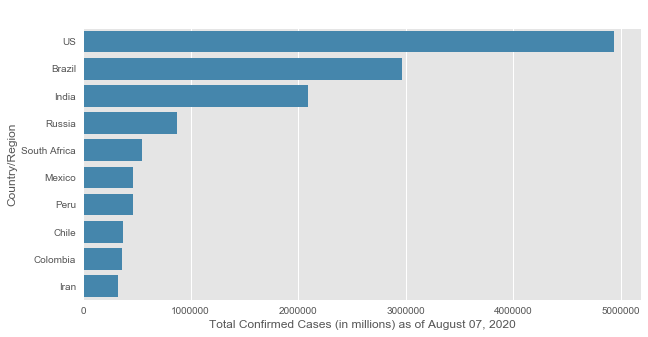

In [132]:
blue=sns.color_palette()[1]
last_col = conf_df.columns[-1]
latest_date = datetime.datetime.strptime(last_col, '%m/%d/%y').strftime('%B %d, %Y') # Modify the latest date in the 'Month DD, YYYY' format.
plt.figure(figsize = (10, 5))
plt.title(f'Top {10} Countries with Highest COVID-19 Confirmed Cases', 
              fontsize = 21)
sns.barplot(desc_grp_conf_df[last_col].head(10), desc_grp_conf_df['Country/Region'].head(10), orient = 'h',color=blue)
plt.xlabel(f'Total Confirmed Cases (in millions) as of {latest_date}')
    

In [143]:
df['7/29/20'].dtypes

dtype('int64')

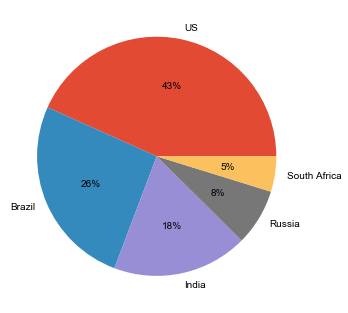

In [164]:
lables=desc_grp_conf_df['Country/Region'].head(5);
plt.pie(desc_grp_conf_df[last_col].head(5),labels=lables ,textprops=dict(color="black"),autopct='%1.0f%%');


In [147]:
desc_grp_conf_df[last_col].head(5)

174    4941755
23     2962442
79     2088611
140     875378
156     545476
Name: 8/7/20, dtype: int64

In [154]:
desc_grp_conf_df[last_col].head(5)

174    4941755
23     2962442
79     2088611
140     875378
156     545476
Name: 8/7/20, dtype: int64

In [155]:
desc_grp_conf_df['Country/Region'].head(5)

174              US
23           Brazil
79            India
140          Russia
156    South Africa
Name: Country/Region, dtype: object

In [172]:
frames = [desc_grp_conf_df[last_col], desc_grp_conf_df['Country/Region'] ]

c_df = pd.concat([desc_grp_conf_df[last_col], desc_grp_conf_df['Country/Region']], axis=1)

In [173]:
c_df

,8/7/20,Country/Region
174,4941755,US
23,2962442,Brazil
79,2088611,India
140,875378,Russia
156,545476,South Africa
...,...,...
50,18,Dominica
142,17,Saint Kitts and Nevis
75,12,Holy See
184,10,Western Sahara


In [175]:
c_df.reset_index(drop=True)

,8/7/20,Country/Region
0,4941755,US
1,2962442,Brazil
2,2088611,India
3,875378,Russia
4,545476,South Africa
...,...,...
183,18,Dominica
184,17,Saint Kitts and Nevis
185,12,Holy See
186,10,Western Sahara
